# Creación del algoritmo KNN

## Importando librerías

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random

from matplotlib import style
from math import sqrt
from collections import Counter

## Creación del dataset

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

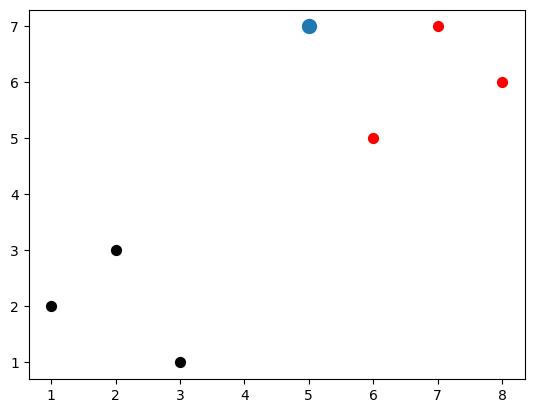

In [7]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100)
plt.show()

## Implementando el algoritmo

In [67]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("¡K es un valor menos que el número total de elementos a votar!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            # d = sqrt((feature[0] - predict[0])**2 + (feature[1] - predict[1])**2)
            # d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
            d = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([d, group])
    if verbose == True:
        print(distances)        
    votes = [i[1] for i in sorted(distances)[:k]] # Sorted ordena por la primera columna
    if verbose == True:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)[0][0]
    if verbose == True:
        print(vote_result)
    return vote_result

In [53]:
new_point = [4.5,4.5]
result = k_nearest_neighbors(dataset, new_point)
result

'r'

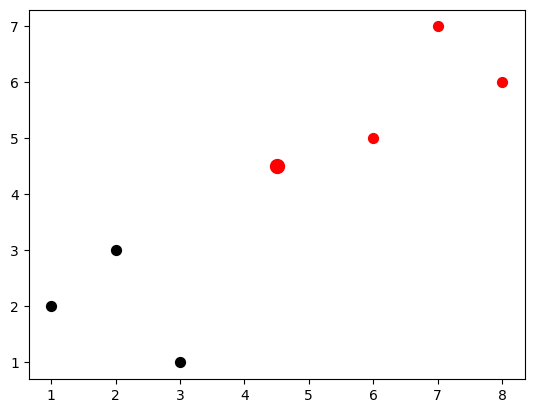

In [18]:
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = result)
plt.show()

## Aplicando nuestro KNN al dataset Cancer

In [58]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt")
df.replace("?", -99999, inplace = True)
df.columns = ['Name', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Class']
df = df.drop(["Name"],1)

C:\Users\SANDRO\AppData\Local\Temp\ipykernel_1444\3858944503.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["Name"],1)


In [59]:
full_data = df.astype(float).values.tolist()

In [60]:
random.shuffle(full_data)
test_size = 0.2

In [61]:
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

In [62]:
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size *len(full_data)):]

In [63]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [71]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct +=1
        total +=1
print('Eficacia del KNN = ', correct/total)

Eficacia del KNN =  0.9496402877697842
